# Crack Detection

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Set dimensions according to the size of the image under test

In [2]:
# img_size = 128
img_size = 256

#### Insert the path to the image file you want to predict

In [3]:
img_to_predict = "./test_images/1.jpg"

In [4]:
# function to return the correct shape from a image path
def prepare_image(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    return img.reshape(-1, img_size, img_size, 1)

In [5]:
prepare_image(img_to_predict).shape

(1, 256, 256, 1)

#### Load the pretrained model

In [6]:
model = tf.keras.models.load_model("./crack_classifier.model")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


#### Predict

In [7]:
prediction = model.predict([prepare_image(img_to_predict)])

In [8]:
# Setting the threshold
if prediction[0][0] <= .5:
    pred_text = "Crack with confidence of {:.2f}%".format((1 - prediction[0][0]) * 100)
elif prediction[0][0] > .5:
    pred_text = "Intact with confidence of {:.2f}%".format((1 - prediction[0][0]) * 100)
else:
    print("\nSomething went wrong...")

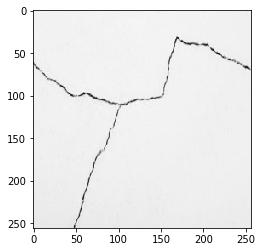

In [9]:
plt.imshow(cv2.resize(cv2.imread(img_to_predict), (img_size, img_size)))

In [10]:
print(pred_text)

Crack with confidence of 100.00%


## Footnote: Try for other images by changing providing the path and re-running the entire kernel

./test_images/1.jpg
Loading trained model...
Trained model loaded!
Model predicting...
Crack with confidence of 100.00%


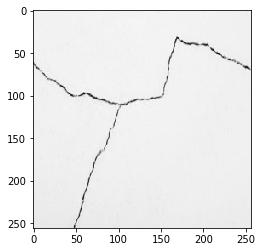

./test_images/2.jpg
Loading trained model...
Trained model loaded!
Model predicting...
Intact with confidence of 0.00%


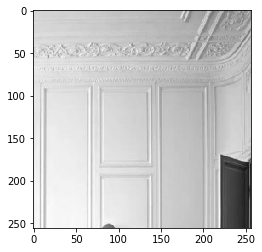

./test_images/3.jpg
Loading trained model...
Trained model loaded!
Model predicting...
Intact with confidence of 0.00%


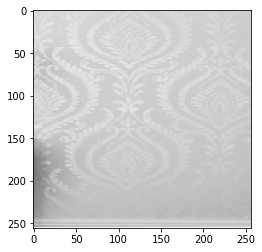

./test_images/4.jpg
Loading trained model...
Trained model loaded!
Model predicting...
Intact with confidence of 0.00%


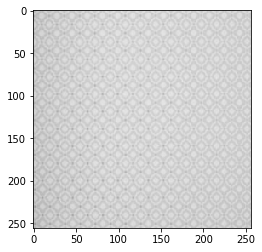

./test_images/5.jpg
Loading trained model...
Trained model loaded!
Model predicting...
Crack with confidence of 100.00%


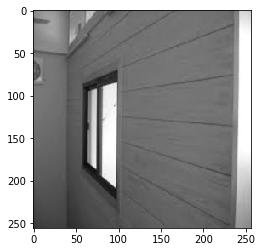

In [11]:
for i in range(5):

    # img_size = 128
    img_size = 256
    img_to_predict = "./test_images/{}.jpg".format(i+1) #Insert the path to the image file you want to predict

    print(img_to_predict)
    # function to return the correct shape from a image path
    def prepare_image(file):
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        return img.reshape(-1, img_size, img_size, 1)

    print("Loading trained model...")
    model = tf.keras.models.load_model("./crack_classifier.model") #Replace the dots with the directory you saved the model in
    print("Trained model loaded!")

    print("Model predicting...")
    prediction = model.predict([prepare_image(img_to_predict)])

    # print the prediction based on a 0.5 threshold of the output
    if prediction[0][0] <= .5:
        # pred_text = "Networks prediction:\nThis surface DOES have a crack on it. Confidence: {:.2f}%".format((1 - prediction[0][0]) * 100)
        pred_text = "Crack with confidence of {:.2f}%".format((1 - prediction[0][0]) * 100)
    elif prediction[0][0] > .5:
        # pred_text = "Networks prediction:\nThis surface DOES NOT have a crack on it. Confidence: {:.2f}%".format((1 - prediction[0][0]) * 100)
        pred_text = "Intact with confidence of {:.2f}%".format((1 - prediction[0][0]) * 100)
    else:
        print("\nSomething went wrong...")
        
    # display the input image along with the prediction
    plt.imshow(cv2.resize(cv2.imread(img_to_predict), (img_size, img_size)))
    # plt.title("What the Neural Network is receiving as input:")
    # plt.text(2, 5, pred_text, fontweight = "bold")
    print(pred_text)
    plt.show()
